In [2387]:
import pandas as pd#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2388]:
df=pd.read_csv('Titanic_train.csv')#loading dataset

In [2389]:
df.shape#shape of the data

(891, 12)

In [2390]:
df.head()#first 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2391]:
df.info()#number of columns,null values,data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2392]:
df.describe()#summary statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2393]:
df.isna().sum()#null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

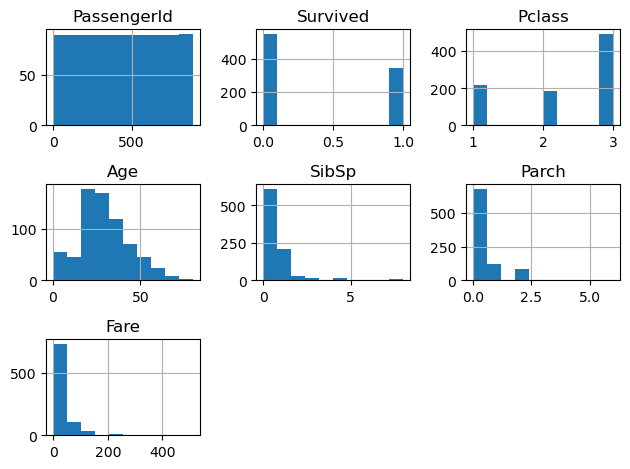

In [2394]:
df.hist()#histogram of dataset
plt.tight_layout()

<Axes: >

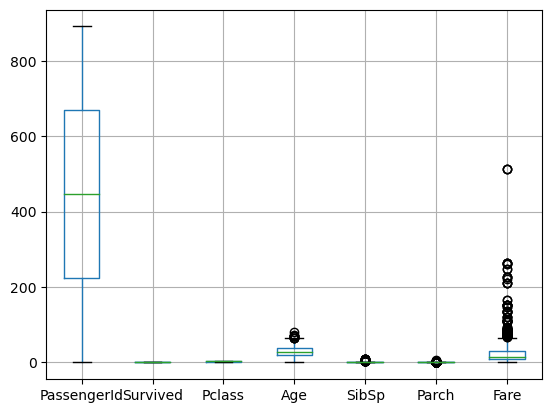

In [2395]:
df.boxplot()#boxplot of dataset

In [2396]:
#replacing null values and deleting the columns(which have lot of null values)
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [2397]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [2398]:
def cap_upper_outliers(df, column):#imputation of outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x: min(x, upper_bound))
    df[column] = df[column].apply(lambda x: max(min(x,upper_bound),lower_bound))
    return df

# List of numerical columns to cap outliers
columns_to_cap = ['Age', 'SibSp' ,'Parch','Fare']
      # Include 'fbs' if it's not binary

# Apply the capping function to each column
for col in columns_to_cap:
    df = cap_upper_outliers(df, col)

<Axes: >

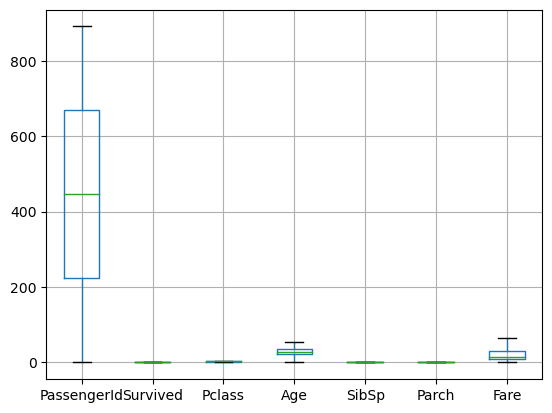

In [2399]:
df.boxplot()

In [2400]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
le = LabelEncoder()

# Listing categorical columns to encode using LabelEncoder
categorical_cols = ['Sex','Embarked']  # Choosing categorical columns

# Applying LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.drop(columns=['PassengerId','Ticket','Parch','Name','Age'], inplace=True)


<Axes: >

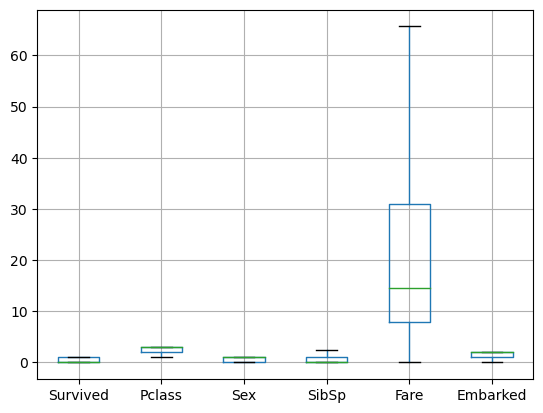

In [2401]:
df.boxplot()

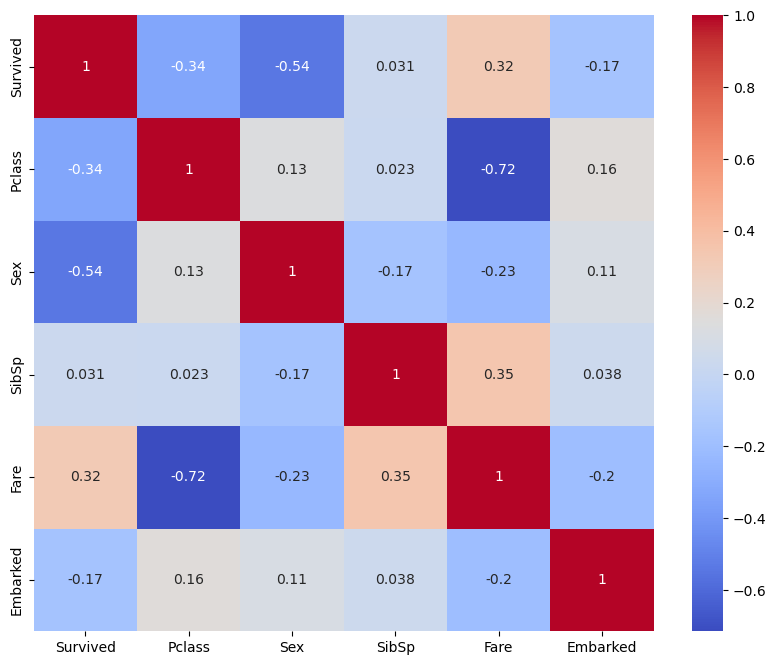

In [2402]:
plt.figure(figsize=(10, 8))#correlation of data
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [2403]:
# Feature-target split
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)  # Replace 'target_column' with the name of your target column
y = df['Survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [2404]:
print("Shape of X:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X: (712, 5)
Shape of y_train: (712,)


In [ ]:
#model building

In [2405]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [2406]:
y_pred=log_reg.predict(X_train)

In [2407]:
print(len(y_train))  # Should print 891
print(X_train.shape[0])    # Should also print 891 if using the full training set


712
712


In [2408]:
print("Length of y_train:", len(y_train))
print("Length of y_pred:", len(y_pred))

Length of y_train: 712
Length of y_pred: 712


In [2409]:
y_pred_df = pd.DataFrame({'y_train': y_train.values,  # Use .values to avoid index issues
                          'Yhat': y_pred})

In [2412]:
print(y_pred_df.head())


   y_train  Yhat
0        0     0
1        0     0
2        0     0
3        0     0
4        0     0


#model evaulation

In [2413]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
y_pred=log_reg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

print(f'Accuracy:{accuracy}')
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1 Score:{f1}')
print(f'ROC_AUC Score:{roc_auc}')

Accuracy:0.770949720670391
Precision:0.7088607594936709
Recall:0.7567567567567568
F1 Score:0.7320261437908496
ROC_AUC Score:0.7688545688545689


In [ ]:
#predicted values

In [2414]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [2415]:
y_pred_df=pd.DataFrame({'y_train':y_train,
                        'Yhat':log_reg.predict(X_train)})# or 'yhat':y_pred

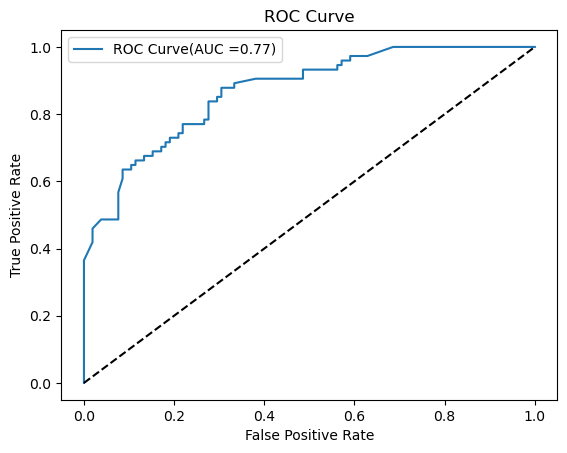

In [2416]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label=f'ROC Curve(AUC ={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')


In [ ]:
#coefficients of data

In [2421]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
print(feature_importance)


    Feature  Coefficient
0    Pclass    -0.763113
1       Sex    -2.552932
2     SibSp    -0.258989
3      Fare     0.005532
4  Embarked    -0.282305


In [2422]:
#significance of data

In [2423]:
#The coefficient is very small and positive.PassengerId insignificant for predicting survival.
#The negative coefficient suggests that as the class number increases (i.e., moving from 1st to 3rd class), the likelihood of survival decreases. Passengers in lower classes had a lower probability of survival, which aligns with historical data.Passenger class was an important factor in survival.
#The coefficient for Name is very close to zero and negative.Name insignificant and should be excluded from the model.
#The large negative coefficient indicates that being male decreases the probability of survival significantly. The Sex feature is binary, and the negative value here suggests that females had a much higher chance of survival compared to males.Highly significant. 
#The number of siblings/spouses onboard has a meaningful negative impact on survival chances.Sibsp Significant. 
#This feature is not a meaningful predictor of survival in the current model.Parch Insignificant. 
#Ticket numbers, like PassengerId, are unique identifiers and should not contribute to survival prediction.Insignificant and should be excluded from the model.
#The fare is an important predictor, with wealthier passengers more likely to survive.Fare Significant. 
#Embarked somewhat significant but less impactful compared to core features like class and sex.

In [ ]:
#downloading as pickle file

In [2424]:
import pickle
# Save the model
pickle.dump (log_reg,open('LogisticRegression(Train).pkl', 'wb')) 